# Limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore')

In [2]:
crimes = pd.read_csv("NYC_crime.csv")

In [3]:
crimes.head()

,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25.0,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14.0,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67.0,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77.0,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77.0,2.0,16.0,2.0,49.0,49.0


In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309169 entries, 0 to 1309168
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1309169 non-null  int64  
 1   arrest_key                   1309169 non-null  int64  
 2   arrest_date                  1309169 non-null  object 
 3   pd_desc                      1309169 non-null  object 
 4   ofns_desc                    1309169 non-null  object 
 5   law_code                     1309168 non-null  object 
 6   law_cat_cd                   1302726 non-null  object 
 7   age_group                    1309168 non-null  object 
 8   perp_sex                     1309168 non-null  object 
 9   perp_race                    1309168 non-null  object 
 10  latitude                     1309168 non-null  float64
 11  longitude                    1309168 non-null  float64
 12  arrest_boro                  1309168 non-n

## Entendendo a base de dados
### As colunas

| pd_desc | ofns_desc | law_code | law_cat_cd | arrest_boro | arrest_precinct| 
| --- | --- | --- | ---| --- | ---|
| PD code | Ofense key code | Penal Law code | Level of Offense| The borough of arrest| Police precinct  of arrest

|:@computed_region_f5dn_yrer|:@computed_region_yeji_bk3q| :@computed_region_92fq_4b7q| :@computed_region_sbqj_enih
|---|---|---|---|
|Community Districts| Borough Boundaries| City Council Districts| Police Precincts

Informações obtidas na descrição da base de dados escolhida

Não interessa para essa análise as colunas `Unnamed: 0` e `arrest_key`, então vamos retirá-las

In [82]:
crimes_filtered = crimes.drop (columns=['arrest_key', 'Unnamed: 0'])

In [83]:
crimes_filtered = crimes_filtered.rename(columns={":@computed_region_f5dn_yrer":"comm_distr",
                                                  ":@computed_region_yeji_bk3q":"boro_bound",
                                                  ":@computed_region_92fq_4b7q": "cty_counc_ditr",
                                                  ":@computed_region_sbqj_enih": "pd_precinct",
                                                  "law_cat_cd": "lvl_offense",
                                                  "pd_desc": "pd_code"
                      })

In [84]:
crimes_filtered.head()

,arrest_date,pd_code,ofns_desc,law_code,lvl_offense,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,comm_distr,boro_bound,cty_counc_ditr,pd_precinct
0,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25.0,0.0,7.0,4.0,36.0,16.0
1,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14.0,0.0,12.0,4.0,10.0,8.0
2,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67.0,0.0,61.0,2.0,11.0,40.0
3,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77.0,0.0,16.0,2.0,49.0,49.0
4,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77.0,2.0,16.0,2.0,49.0,49.0


### As linhas

Simplificando os valores da coluna `perp_race`

In [85]:
crimes_filtered['perp_race'].value_counts()

BLACK                             628533
WHITE HISPANIC                    333782
WHITE                             159061
BLACK HISPANIC                    109367
ASIAN / PACIFIC ISLANDER           62627
UNKNOWN                            11616
AMERICAN INDIAN/ALASKAN NATIVE      3143
OTHER                               1039
Name: perp_race, dtype: int64

In [86]:
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='AMERICAN INDIAN/ALASKAN NATIVE']='Native'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='BLACK']='Black'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='WHITE']='White'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='ASIAN / PACIFIC ISLANDER']='Asian'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='WHITE HISPANIC']='White Hispanic'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='BLACK HISPANIC']='Black Hispanic'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='UNKNOWN']='Unknown'
crimes_filtered['perp_race'][crimes_filtered['perp_race']=='OTHER']='Other'

In [87]:
crimes_filtered['perp_race'].value_counts()

Black             628533
White Hispanic    333782
White             159061
Black Hispanic    109367
Asian              62627
Unknown            11616
Native              3143
Other               1039
Name: perp_race, dtype: int64

<br>
Retirando os valores faltantes
<br>

In [88]:
crimes_filtered=crimes_filtered.dropna()

## Escolhendo os valores a serem utilizados na visualização

<br>
Selecionando apenas as prisões realizadas em <b> 2019 </b>

In [89]:
crimes_2019 = []
for i in crimes_filtered['arrest_date']:
    if '2019' in i:
        crimes_2019.append(i)

In [90]:
crimes_filtered = crimes_filtered.loc[crimes_filtered['arrest_date'].isin(crimes_2019)]
crimes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160787 entries, 0 to 162616
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   arrest_date        160787 non-null  object 
 1   pd_code            160787 non-null  object 
 2   ofns_desc          160787 non-null  object 
 3   law_code           160787 non-null  object 
 4   lvl_offense        160787 non-null  object 
 5   age_group          160787 non-null  object 
 6   perp_sex           160787 non-null  object 
 7   perp_race          160787 non-null  object 
 8   latitude           160787 non-null  float64
 9   longitude          160787 non-null  float64
 10  arrest_boro        160787 non-null  object 
 11  arrest_precinct    160787 non-null  float64
 12  jurisdiction_code  160787 non-null  float64
 13  comm_distr         160787 non-null  float64
 14  boro_bound         160787 non-null  float64
 15  cty_counc_ditr     160787 non-null  float64
 16  pd

<br>


Selecionado apenas `perp_sex` igual a <b> M </b>

In [91]:
crimes_filtered = crimes_filtered.loc[crimes_filtered['perp_sex']=='M']
crimes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 162615
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   arrest_date        131185 non-null  object 
 1   pd_code            131185 non-null  object 
 2   ofns_desc          131185 non-null  object 
 3   law_code           131185 non-null  object 
 4   lvl_offense        131185 non-null  object 
 5   age_group          131185 non-null  object 
 6   perp_sex           131185 non-null  object 
 7   perp_race          131185 non-null  object 
 8   latitude           131185 non-null  float64
 9   longitude          131185 non-null  float64
 10  arrest_boro        131185 non-null  object 
 11  arrest_precinct    131185 non-null  float64
 12  jurisdiction_code  131185 non-null  float64
 13  comm_distr         131185 non-null  float64
 14  boro_bound         131185 non-null  float64
 15  cty_counc_ditr     131185 non-null  float64
 16  pd

# Análise unidimensional

Text(0, 0.5, '')

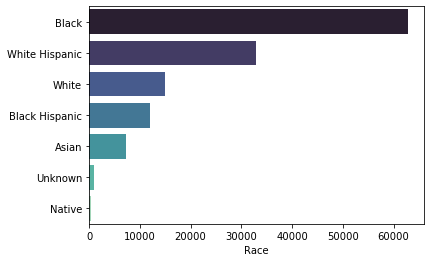

In [92]:
sns.countplot(y="perp_race", 
              data = crimes_filtered, 
              palette="mako",
              order = crimes_filtered['perp_race'].value_counts().index)
plt.xlabel("Race")
plt.ylabel("")

Text(0, 0.5, '')

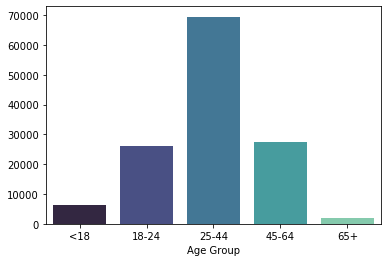

In [93]:
age_order = ["<18","18-24","25-44","45-64","65+"]
qualitative_colors= sns.color_palette("Set3",5)
sns.countplot(x="age_group", 
              data = crimes_filtered, 
              order=age_order, 
              palette="mako")
plt.xlabel("Age Group")
plt.ylabel("")

Text(0, 0.5, '')

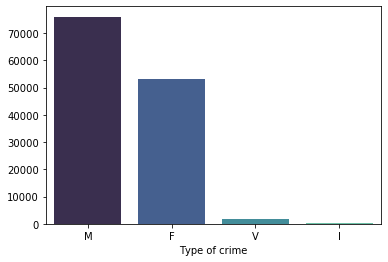

In [94]:
sns.countplot(x="lvl_offense", 
              data = crimes_filtered,  
              palette="mako",
             order = crimes_filtered['lvl_offense'].value_counts().index)
plt.xlabel("Type of crime")
plt.ylabel("")